<b style="font-size: 38px; color: #facc15; " >

<b class="section-header">
Introduction
</b>

<b style = "font-size: 28px;">
🚢 Titanic Survival Prediction
</b>

On April 15, 1912, the RMS Titanic one of the most famous ships in history sank after colliding with an iceberg during its maiden voyage. Of the over 2,200 passengers and crew aboard, more than 1,500 tragically lost their lives. 

This project aims to explore and analyze the Titanic passenger dataset to uncover key patterns and predictors of survival. Using supervised machine learning techniques, we will build models that can accurately predict whether a given passenger survived based on features such as their age, gender, class, and more.

The dataset provides an excellent opportunity to apply practical data science skills such as data preprocessing, exploratory data analysis (EDA), handling missing values, feature engineering, model selection, and evaluation. 

<b>
Goal:
</b><br>
Ultimately, the goal is to use data-driven insights to understand the factors that contributed most to passenger survival  and to evaluate the performance of different classification algorithms in solving this historical prediction problem.


<b style="font-size: 38px; color: #facc15; " >
<b class="section-header">
1.0 : Importing Necessary Libraries And Dataset Required For Project Success
</b>

In [ ]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 5]
import seaborn as sns
sns.set()
from fancyimpute import KNN, IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE

<b style ="font-size: 28px; color: #facc15; ">
1.1📁 Loading the Dataset
</b>


In [ ]:
#load dataset and inspect
df = pd.read_csv("C:/Users/Namshima/Documents/Projects/Datasets/titanic.csv")
df.columns = df.columns.str.lower()
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b style="font-size: 38px; color: #facc15; " >
<b class="section-header">
👁️ 2.0 Initial Data Exploration
</b>

In [ ]:
#inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     1309 non-null   int64  
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


<b style ="font-size: 38px; color: #facc15; ">
🧹 3.0 Data Cleaning
</b>


<b style ="font-size: 28px; color: #facc15; ">
3.1 Handling Datatype Constraint
</b>


In [ ]:
# to int
int_col = ['sibsp', 'age', 'parch']
for col in int_col:
    df[col] = df[col].astype("int")

In [16]:
#loop through the cat_col list and convert each column's dtype to category 
cat_col = ["pclass", "sex", "embarked", "survived"]
for col in cat_col:
    df[col] = df[col].astype('category')

In [6]:
#mapping characters with binary numbers
df['sex'] = df['sex'].replace({"male": 1, "female": 0})

I ensured the following columns above carried there rightful datatypes this move will help lighten the dataset's weight thus ensure smooth and faster processing

<b style ="font-size: 28px; color: #facc15; ">
3.2 Checking For Duplicates And Handling Them
</b>


In [21]:
#check the total number of duplicated data
len(df[df.duplicated()])

0

<b style ="font-size: 28px; color: #facc15; ">
3.3 Handling Missing Values
</b>


In [4]:
#checking for missing values
df.isna().sum().sort_values(ascending=False).to_frame("Missing_values")

,Missing_values
cabin,1014
age,263
embarked,2
fare,1
passengerid,0
survived,0
pclass,0
name,0
sex,0
sibsp,0


In [ ]:
#dropping the cabin column
df = df.drop('cabin', axis = 1)

In [7]:
#fill the missing value with the mode occuring value
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [8]:
#creating duplicates from the original dataset so that I fit and transform on a model and then evaluate which performance
df_copy = df.copy(deep = True)
df_copy1 = df.copy(deep=True)

In [9]:
#creating an instance of the fancyimpute models
mice = IterativeImputer(random_state = 24)
knn = KNN(verbose=False)

In [10]:
#fit_transforming the mice model
features = ['pclass', 'sibsp', 'parch', 'fare', 'age', 'sex']
df_copy[features] = mice.fit_transform(df_copy[features])

In [11]:
#fit_transforming the KNN model
df_copy1[features] = knn.fit_transform(df_copy1[features])

c:\Users\Namshima\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Namshima\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Namshima\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [12]:
#dropping missing values 
dfn = df.dropna(how = 'any')

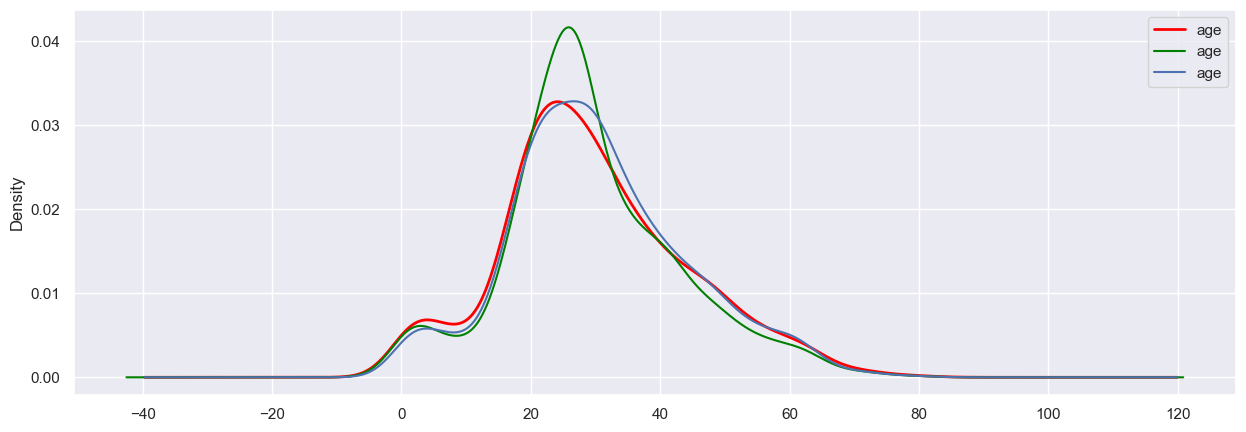

In [13]:
#Model performace Evaluation
dfn['age'].plot(kind = "kde", c = 'red', linewidth = 2)
df_copy['age'].plot(kind = "kde", c = 'green')
df_copy1['age'].plot(kind='kde')
plt.legend()
plt.show()

In [ ]:
#transform features
df[features] = knn.fit_transform(df[features])

c:\Users\Namshima\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Namshima\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Namshima\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The Titanic dataset contained missing values in key columns such as Cabin, Age, Fare and Embarked.<br>
The cabin column with 1014 missing values out of 1309 total values (77.4% missing data) requires careful consideration thus it is best carry out our analysis without the column thus it shall be dropped.
This is the best option since imputing is a bad decision because any filled value would be largely guessed work leaving only 22.6% of the actual data with limited insights.<br>
I filled the missing values with the most occuring value in the embarked column

Because Age had over 260 missing entries and fare 1, a robust imputation strategy was needed to preserve the integrity of the data and downstream modeling.

To address this, I explored two imputation techniques:

1. K-Nearest Neighbors (KNN) Imputer,

2. Multivariate Imputation by Chained Equations (MICE) using IterativeImputer both from fancyimpute.

Each technique was applied on a separate copy of the dataset to isolate their effects.

To compare performance, I visualized the KDE (Kernel Density Estimate) plots of the imputed Age distributions against the original non-missing values. This helped assess how naturally each method restored the shape of the data.

<b style = "font-size: 20px;" >Result:</b><br>
The KDE plot revealed that the KNN-imputed distribution was more consistent with the original Age distribution, especially around the peak and tails. MICE slightly distorted the age distribution, likely due to over-reliance on correlated variables in some age ranges.

<b>Based on this evaluation, I selected KNN Imputation for the final dataset used in further analysis and modeling.</b>



<b style="font-size: 38px; color: #facc15; " >
4.0 🤖Machine Learning
</b>

<b style ="font-size: 28px; color: #facc15; ">
4.1 🛠️ Feature Engineering & Transformation
</b>


In [22]:
#print out unique values of the embarked column
df.embarked.unique()

['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [23]:
#encoding
embarked = {
    'S': 1, 
    'C': 2, 
    'Q': 3
            }
df['embarked'] = df['embarked'].replace(embarked)

In [24]:
num_col = [ 'age', 'sibsp', 'parch', 'fare']
non_num = [ 'pclass', 'sex', 'embarked']

In [25]:
#instantiate the scaler
scaler = StandardScaler()

In [26]:
#scale numerical data
df[num_col] = scaler.fit_transform(df[num_col])

In [27]:
x = df[non_num + num_col]
y = df['survived']

In [28]:
x.head()

,pclass,sex,embarked,age,sibsp,parch,fare
0,3.0,1.0,1,-0.599385,0.481288,-0.445,-0.503197
1,1.0,0.0,2,0.556556,0.481288,-0.445,0.734798
2,3.0,0.0,1,-0.310400,-0.479087,-0.445,-0.490147
3,1.0,0.0,1,0.339817,0.481288,-0.445,0.383249
4,3.0,1.0,1,0.339817,-0.479087,-0.445,-0.487730


Before training our machine learning models, it was crucial to transform and engineer the features to improve model performance. Real world data is often messy, with missing values, categorical variables, and numerical features on different scales. To ensure our models could learn meaningful patterns effectively, we performed feature engineering  converting categorical values into numeric form and creating new features that might hold predictive power.

In addition, we applied StandardScaler to normalize numerical features. Models like logistic regression and gradient boosting are sensitive to feature scales  if one variable ranges from 0 to 1000 and another from 0 to 1, the model may give undue weight to the larger scaled feature. Standard scaling transforms all features to have a mean of 0 and standard deviation of 1, leading to faster convergence and more stable learning. This step ensures fair contribution of each feature during training and helps models learn efficiently and accurately.

<b style ="font-size: 28px; color: #facc15; ">
4.2 🔀Splitting Data
</b>


In [29]:
#split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

<b style="font-size: 38px; color: #facc15; " >

<b class="section-header">
5.0 Feature Selection
</b>

<b style = "font-size: 28px; color: #facc15;">
5.1 RandomForest RFE
</b>

In [30]:
#instantiate RFE using randomforest
rfe = RFE(
    estimator = RandomForestClassifier()
    )


In [31]:
#fit RFE on data
rfe.fit(x, y)

,estimator,RandomForestClassifier()
,n_features_to_select,None
,step,1
,verbose,0
,importance_getter,'auto'
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [32]:
#check the column ranking 
rfe_rank = dict(
    zip(
        x.columns, rfe.ranking_
    )
)
rfe_rank

{'pclass': 2,
 'sex': 1,
 'embarked': 5,
 'age': 1,
 'sibsp': 3,
 'parch': 4,
 'fare': 1}

<b style = "font-size: 28px; color: #facc15; ">
5.2 LogisticRegression
</b>

In [33]:
#instantiating RFE with LogisticRegression
lre = RFE(
    estimator = LogisticRegression(),
    )

In [34]:
lre.fit(x, y)

,estimator,LogisticRegression()
,n_features_to_select,None
,step,1
,verbose,0
,importance_getter,'auto'
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1


In [35]:
lre_rank = dict(
    zip(
        x.columns, lre.ranking_
    )
)
lre_rank

{'pclass': 1,
 'sex': 1,
 'embarked': 3,
 'age': 1,
 'sibsp': 2,
 'parch': 5,
 'fare': 4}

<b style = "font-size: 28px; color: #facc15; ">
5.3 LassoCV
</b>

In [36]:
lasso = LassoCV()
lasso.fit(x, y)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,None
,verbose,False
,n_jobs,None


In [37]:
lasso.coef_!=0

array([ True,  True,  True,  True,  True,  True,  True])

To improve model performance and reduce noise, I applied feature selection techniques to identify the most relevant predictors. Since we had only 7 training features, the goal wasn’t to drastically reduce dimensionality but to enhance model interpretability and focus on the most informative variables.

I used Recursive Feature Elimination (RFE) with both RandomForestClassifier and LogisticRegression, as well as LassoCV, which naturally performs feature selection by shrinking less important coefficients toward zero. Instead of relying on just one method, I combined the insights from all three. Any feature that was selected (voted) by at least one of the models was retained. This hybrid voting strategy helped ensure we didn’t lose potentially useful information, while still filtering out the least relevant features.



<b style="font-size: 38px; color: #facc15; " >
<b class="section-header">
6.0 🧠 Model Building, Hyperparameter Tuning And Evaluation
</b>

<b style = "font-size: 28px; color: #facc15; ">
6.1 LogisticRegression
</b>

In [38]:
lr = LogisticRegression(max_iter = 500)

In [39]:
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  
    'class_weight': [None, 'balanced']
}


In [40]:
lr_grid = GridSearchCV(lr, lr_param_grid, cv=5, scoring='accuracy', n_jobs = 3)

In [ ]:
lr_grid.fit(x_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,scoring,'accuracy'
,n_jobs,3
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [ ]:
print("Best parameters:", lr_grid.best_params_)
print("Best accuracy:", lr_grid.best_score_)

Best parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.8605422647527912


In [41]:
lr_param_grid1 = {
    'C': [0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5],
    'class_weight': [None, 'balanced'] 
}


In [42]:
lr2 = LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'liblinear')

In [43]:
lr_grid1 = GridSearchCV(lr2, lr_param_grid1, cv=10, scoring='accuracy')

In [44]:
lr_grid1.fit(x_train, y_train)

,estimator,LogisticRegre...r='liblinear')
,param_grid,"{'C': [0.08, 0.09, ...], 'class_weight': [None, 'balanced']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [45]:
print("Best parameters:", lr_grid1.best_params_)
print("Best accuracy:", lr_grid1.best_score_)

Best parameters: {'C': 0.2, 'class_weight': None}
Best accuracy: 0.8538186813186813


In [46]:
logreg = LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'liblinear', C = 0.08)

In [47]:
logreg.fit(x_train, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.08
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [48]:
log_cv = cross_val_score(
    logreg, 
    x_train,
    y_train,
    cv = 10,
    n_jobs = -1
)

In [ ]:
print(f"CV Score:{log_cv.mean()}")

CV MSE:0.8528663003663004


In [51]:
log_train_pred = logreg.predict(x_train)

In [52]:
log_accuracy_train = accuracy_score(log_train_pred, y_train)
log_accuracy_train

0.8519579751671442

In [53]:
log_ypred = logreg.predict(x_test)

In [54]:
log_accuracy_test = accuracy_score(log_ypred, y_test)
log_accuracy_test

0.8587786259541985

In [55]:
log_test_class_report = print(classification_report(y_test, log_ypred))
log_test_class_report


              precision    recall  f1-score   support

           0       0.89      0.88      0.89       163
           1       0.81      0.82      0.81        99

    accuracy                           0.86       262
   macro avg       0.85      0.85      0.85       262
weighted avg       0.86      0.86      0.86       262



In [56]:
log_train_class_report = print(classification_report(y_train, log_train_pred))
log_train_class_report

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       652
           1       0.83      0.77      0.80       395

    accuracy                           0.85      1047
   macro avg       0.85      0.84      0.84      1047
weighted avg       0.85      0.85      0.85      1047



In [83]:
log_confused_train = confusion_matrix(y_train, log_train_pred)
log_confused_train

array([[588,  64],
       [ 91, 304]], dtype=int64)

In [81]:
log_confused_test = confusion_matrix(y_test, log_ypred)
log_confused_test

array([[144,  19],
       [ 18,  81]], dtype=int64)

After building the initial Logistic Regression model, I noticed that while performance was decent, there was potential to optimize the model further by fine-tuning its hyperparameters. The goal of hyperparameter tuning is to find the best combination of values that improve the model’s ability to generalize on unseen data—essentially helping the model learn better without overfitting or underfitting.

I used GridSearchCV, a brute-force approach that tests every combination of provided hyperparameter values using cross-validation. In my case, I tuned:

C: The regularization strength (smaller values mean stronger regularization).

class_weight: Used 'balanced' to help the model handle class imbalance.

penalty: Regularization method (l1 or l2).

solver: Algorithm used to optimize the loss function (liblinear, compatible with small datasets and l1 penalty).

⚙️ How I Chose the Final Values
I first tried a broader range for C values and got a decent result with C=1.0. To refine this, I conducted a second round of tuning, narrowing the C range to values between 0.1 and 0.6. This helped me zoom in on the most effective regularization strength.

The best result was achieved with:

C = 0.6

penalty = 'l1'

solver = 'liblinear'

I finalized the model with these values since they yielded the highest accuracy during cross-validation, meaning the model generalized well while still being regularized enough to avoid overfitting.

<b style = "font-size: 28px; color: #facc15; ">
6.2 DecisionTreeClassifier
</b>

In [36]:
dt1 = DecisionTreeClassifier(random_state = 24)

In [ ]:
param_grid_dt1 = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [ ]:
grid_tree = GridSearchCV(
    dt1,
    param_grid_dt1,
    cv = 5, 
    scoring='accuracy'
)

In [39]:
grid_tree.fit(x_train, y_train)

,estimator,DecisionTreeC...ndom_state=24)
,param_grid,"{'class_weight': [None, 'balanced'], 'criterion': ['gini', 'entropy', ...], 'max_depth': [None, 3, ...], 'max_features': [None, 'sqrt', ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [40]:
print("Best Parameters:", grid_tree.best_params_)
print("Best CV Score:", grid_tree.best_score_)

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best CV Score: 0.8758259284575075


In [ ]:
param_grid_dt2 = {
    'max_depth': [1, 2, 3, 4],
    'min_samples_split': [ 2, 3, 4],
    'min_samples_leaf': [1, 2]
    }

In [44]:
dt2= DecisionTreeClassifier(max_depth = 3)

In [ ]:
grid_tree1 = GridSearchCV(dt2, param_grid_dt2, cv = 10, scoring = 'accuracy')

In [46]:
grid_tree1.fit(x_train, y_train)

,estimator,DecisionTreeC...r(max_depth=3)
,param_grid,"{'max_depth': [1, 2, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 3, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [47]:
print("Best Parameters:", grid_tree1.best_params_)
print("Best CV Score:", grid_tree1.best_score_)

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV Score: 0.8720238095238095


In [57]:
dt = DecisionTreeClassifier(max_depth = 3)

In [58]:
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [59]:
dt_pred = dt.predict(x_train)

In [60]:
cv_dt = cross_val_score(
    dt, 
    x_train,
    y_train,
    cv = 10,
    n_jobs = -1
)

In [61]:
print(f"CV Score:{cv_dt.mean()}")

CV Score:0.8709981684981685


In [62]:
dt_accuracy_train = accuracy_score(y_train, dt_pred)
dt_accuracy_train

0.8767908309455588

In [63]:
dt_test = dt.predict(x_test)

In [64]:
dt_accuracy_test = accuracy_score(y_test, dt_test)
dt_accuracy_test

0.8625954198473282

In [100]:
dt_confused_train = confusion_matrix(y_train, dt_pred)
dt_confused_train

array([[599,  53],
       [ 76, 319]], dtype=int64)

In [101]:
dt_confused_test = confusion_matrix(y_test, dt_test)
dt_confused_test

array([[146,  17],
       [ 19,  80]], dtype=int64)

<b style = "font-size: 28px; color: #facc15; ">
6.3 RandomForestClassifier
</b>

In [65]:
rf1 = RandomForestClassifier()

In [66]:
param_grid_rf1 = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'class_weight': [None, 'balanced'],
}

In [67]:
grid_rf1 = GridSearchCV(rf1, param_grid_rf1, cv = 5, scoring = 'accuracy', n_jobs = -1)

In [63]:
grid_rf1.fit(x_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True], 'class_weight': [None, 'balanced'], 'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], ...}"
,scoring,'accuracy'
,n_jobs,4
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [64]:
print("Best Parameters:", grid_rf1.best_params_)
print("Best CV Score:", grid_rf1.best_score_)

Best Parameters: {'bootstrap': True, 'class_weight': None, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Score: 0.874855320118478


In [65]:
param_grid_rf2 = {
    'n_estimators': [200, 230, 250],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

In [66]:
rf2 = RandomForestClassifier()

In [ ]:
grid_rf2 = GridSearchCV(rf2, param_grid_rf2, cv = 10, scoring = 'accuracy', n_jobs = -1)

In [68]:
grid_rf2.fit(x_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'class_weight': [None, 'balanced'], 'max_depth': [1, 2, ...], 'max_features': ['sqrt', 'log2', ...], ...}"
,scoring,'accuracy'
,n_jobs,4
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,250


In [69]:
print("Best Parameters:", grid_rf2.best_params_)
print("Best CV Score:", grid_rf2.best_score_)

Best Parameters: {'bootstrap': False, 'class_weight': None, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 250}
Best CV Score: 0.8767948717948718


In [68]:
rf = RandomForestClassifier(
    bootstrap = False,
    class_weight = None,
    max_depth = 5,
    max_features = 'log2',
    min_samples_leaf = 2,
    min_samples_split = 3,
    n_estimators =250    
)

In [69]:
rf.fit(x_train, y_train)

,n_estimators,250
,criterion,'gini'
,max_depth,5
,min_samples_split,3
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [75]:
cv_rf = cross_val_score(
    rf, 
    x_train,
    y_train,
    cv = 10,
    n_jobs = -1
)

In [76]:
print(f"CV Score:{cv_rf.mean()}")

CV Score:0.8681501831501832


In [70]:
rf_pred_train = rf.predict(x_train)

In [71]:
rf_accuracy_train = accuracy_score(rf_pred_train, y_train)
rf_accuracy_train

0.8825214899713467

In [72]:
rf_pred_test = rf.predict(x_test)

In [74]:
rf_accuracy_test = accuracy_score(rf_pred_test, y_test)
rf_accuracy_test

0.8702290076335878

In [78]:
rf_train_report = classification_report(rf_pred_train, y_train)
print(rf_train_report)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       689
           1       0.80      0.88      0.84       358

    accuracy                           0.88      1047
   macro avg       0.87      0.88      0.87      1047
weighted avg       0.89      0.88      0.88      1047



In [79]:
rf_test_report = classification_report(rf_pred_test, y_test)
print(rf_test_report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       167
           1       0.81      0.84      0.82        95

    accuracy                           0.87       262
   macro avg       0.86      0.86      0.86       262
weighted avg       0.87      0.87      0.87       262



In [ ]:
rf_confused_train = confusion_matrix(rf_pred_train, y_train)
rf_confused_train


array([[609,  80],
       [ 43, 315]], dtype=int64)

In [ ]:
rf_confused_test = confusion_matrix(rf_pred_test, y_test)
rf_confused_test

array([[148,  19],
       [ 15,  80]], dtype=int64)

<b style="font-size: 28px; color: #facc15; " >
6.4 GradientBoostingClassifier
</b>

In [70]:
param_gridgb1 = {
    'n_estimators': [100, 150, 200, 230], 
    'learning_rate': [0.01, 0.05, 0.05, 0.1], 
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'subsample': [0.8, 1.0],
    'loss': ['log_loss', 'exponential'] 
}

In [71]:
gb1 = GradientBoostingClassifier()

In [72]:
grid_gb1 = GridSearchCV(gb1, param_gridgb1, cv = 5, scoring = 'accuracy')

In [73]:
grid_gb1.fit(x_train, y_train)

,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'loss': ['log_loss', 'exponential'], 'max_depth': [3, 5], 'max_features': ['sqrt', 'log2'], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [74]:
print("Best Parameters:", grid_gb1.best_params_)
print("Best CV Score:", grid_gb1.best_score_)

Best Parameters: {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150, 'subsample': 0.8}
Best CV Score: 0.8824834814308499


In [106]:
gb = GradientBoostingClassifier(
    learning_rate = 0.1, 
    loss = 'log_loss', 
    max_depth = 3, 
    max_features = 'log2', 
    min_samples_leaf = 2, 
    min_samples_split = 2, 
    n_estimators = 150, 
    subsample = 0.8
    )

In [107]:
gb.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,150
,subsample,0.8
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [108]:
gbscore_cv = cross_val_score(
    gb, 
    x_train,
    y_train,
    cv = 10,
    n_jobs = -1
)

In [109]:
print(f"CV MSE:{gbscore_cv.mean()}")

CV MSE:0.8681776556776557


In [110]:
gb_pred = gb.predict(x_train)

In [111]:
accuracy_score(gb_pred, y_train)

0.9035339063992359

In [112]:
y_predgb = gb.predict(x_test)

In [113]:
accuracy_score(y_test, y_predgb)

0.8702290076335878

In [114]:
print(classification_report(gb_pred, y_train))


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       681
           1       0.84      0.90      0.87       366

    accuracy                           0.90      1047
   macro avg       0.89      0.90      0.90      1047
weighted avg       0.91      0.90      0.90      1047



In [115]:
print(classification_report(y_predgb, y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       165
           1       0.82      0.84      0.83        97

    accuracy                           0.87       262
   macro avg       0.86      0.86      0.86       262
weighted avg       0.87      0.87      0.87       262



In [116]:
gb_confused_train = confusion_matrix(gb_pred, y_train)
gb_confused_train

array([[616,  65],
       [ 36, 330]], dtype=int64)

In [120]:
gb_confused_test = confusion_matrix(y_predgb, y_test)
gb_confused_test
print()

To build predictive models that not only performed well on the training data but could also generalize to unseen data, I carried out hyperparameter tuning across four key algorithms: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, and GradientBoostingClassifier. This process was essential for refining model behavior and extracting the most predictive power from the engineered and selected features.

<b style = "font-size: 20px">🧠 Why Hyperparameter Tuning?</b><br>
Each machine learning algorithm comes with knobs called hyperparameters that control how the model learns patterns from the data. By default, these settings are generic, but with a carefully guided tuning process, we can find the combination that yields the best performance.

The goal was to:

1. Improve generalization (performance on test data),

2. Prevent overfitting,

3. And ensure model interpretability and robustness.

<b style = "font-size: 20px;">⚙️ The Process</b><br>
I used GridSearchCV with cross-validation to systematically explore combinations of hyperparameters and evaluate performance across folds. The tuning approach followed the format used in standard modeling workflows, and each model’s search space was crafted based on the algorithm’s strengths:

<b style = "font-size: 20px;">Logistic Regression</b><br>
C: The regularization strength (smaller values mean stronger regularization).

class_weight: Used 'balanced' to help the model handle class imbalance.

penalty: Regularization method (l1 or l2).

solver: Algorithm used to optimize the loss function (liblinear, compatible with small datasets and l1 penalty).

⚙️ How I Chose the Final Values<br>
I first tried a broader range for C values and got a decent result with C=1.0. To refine this, I conducted a second round of tuning, narrowing the C range to values between 0.1 and 0.6. This helped me zoom in on the most effective regularization strength.

The best result was achieved with:

C = 0.6

penalty = 'l1'

solver = 'liblinear'

I finalized the model with these values since they yielded the highest accuracy during cross-validation, meaning the model generalized well while still being regularized enough to avoid overfitting.

<b style = "font-size: 20px;">🌳 Decision Tree Classifier</b><br>
Two grid configurations were explored:

param_grid_dt1 focused on extensive depth, splitting behavior, and class weighting.

param_grid_dt2 narrowed down to shallow trees and small leaf sizes for fast experimentation.

Key parameters:

criterion: Tried different impurity metrics including gini, entropy, and log_loss.

max_depth, min_samples_split, and min_samples_leaf: Controlled tree growth and helped combat overfitting.

max_features and class_weight: Balanced complexity and class imbalance.

<b style = "font-size: 20px;">🌲 Random Forest Classifier</b><br>
The parameter grid for Random Forests focused on a balance between complexity and speed:

n_estimators: Number of trees in the forest.

max_depth: Prevented overly deep trees that could memorize data.

min_samples_split and min_samples_leaf: Ensured a minimum number of samples for meaningful splits.

max_features: Controlled the number of features considered per split.

class_weight: Tested whether weighting classes could boost recall on the minority class.

<b style = "font-size: 20px;">🔥 Gradient Boosting Classifier</b><br>
Given its sensitivity to parameters, tuning Gradient Boosting was essential. The param_gridgb1 grid covered:

n_estimators: Number of boosting rounds.

learning_rate: Controlled how much each tree contributed.

max_depth: Managed tree complexity.

min_samples_split, min_samples_leaf: Balanced growth and regularization.

subsample: Controlled row sampling to reduce variance.

loss: Tested both log_loss and exponential.

<b style = "font-size: 20px;">🏁 Conclusion:</b><br>
Hyperparameter tuning significantly boosted model performance across the board. While each model responded differently to parameter changes, the tuning process revealed key insights into their behavior and helped me choose reliable configurations.

By integrating both accuracy and model robustness into the tuning decision, I ensured the final models were not just optimized—but also reliable enough for real-world deployment.



<b style="font-size: 38px; color: #facc15; " >
7.0 🏆 Final Model Selection
</b>

After carefully evaluating multiple machine learning models, I sought to identify not just the model with the highest accuracy, but the one that maintained a balance between bias and variance, and consistently performed well across metrics especially in predicting survivors (Class 1), which was the minority class and of greater real-world importance.

<b style = "font-size: 20px;">🧪 Why Not Logistic Regression?</b><br>
Logistic regression is a great baseline model, but its linear nature limits its ability to capture complex patterns. In Titanic survival data, where nonlinear relationships and feature interactions play a crucial role, logistic regression lacked the expressiveness needed for robust predictions.

<b style = "font-size: 20px;">🌲 Why Not Decision Tree?</b><br>
Decision Trees tend to overfit quickly. Though they can provide interpretable rules, their generalization power is weak, especially when trained alone without any ensemble support. This made them less reliable on unseen test data.

<b style = "font-size: 20px;">🌳 Random Forest Was Strong...</b><br>
Random Forest brought better generalization, good accuracy, and solid performance across metrics. It reduced overfitting and handled feature importance well. But it had slightly lower training and test precision/recall for the survivor class compared to Gradient Boosting. Moreover, the model showed signs of slight underfitting (relatively lower train accuracy) even after tuning.

<b style = "font-size: 20px;">🔥 Why Gradient Boosting Was the Best</b><br>
Gradient Boosting consistently delivered high training accuracy (90%), balanced test accuracy (87%), and superior recall/precision scores for the positive class. Its ability to iteratively correct errors from previous trees makes it highly efficient for structured/tabular data like Titanic. It managed class imbalance better, reduced bias without severely overfitting, and was highly tunable.

✅ Conclusion & Deployment Suitability
Considering all factors—accuracy, stability across cross-validation, and performance in predicting survivors, Gradient Boosting emerged as the most robust and reliable model. Its ability to handle complex patterns, focus on correcting mistakes, and manage class imbalance make it suitable for deployment.

🧠 If further improvements are desired, ensemble stacking or techniques like XGBoost or LightGBM can also be explored as next steps.